In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("No GPU found, running on CPU.")


No GPU found, running on CPU.


In [2]:
!pwd

/Users/rodrigocarrillo/Documents/Computer Vision/Vending Machines/01_Code


In [3]:
# !pip -q install ultralytics

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

In [5]:
# Load model.
model = YOLO("/Users/rodrigocarrillo/Documents/Computer Vision/Vending Machines/02_Models/yolo11n_HoloSelecta/weights/best.pt")  # load a custom model

In [6]:
# Predict with the model.
conf_threshold = 0.56   # Confidence threshold (0-1)
results = model("/Users/rodrigocarrillo/Documents/Computer Vision/Vending Machines/00_Images/IMG_5197.jpg", conf=conf_threshold)  # predict on an image



image 1/1 /Users/rodrigocarrillo/Documents/Computer Vision/Vending Machines/00_Images/IMG_5197.jpg: 640x480 30 objects, 33.5ms
Speed: 3.1ms preprocess, 33.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 480)


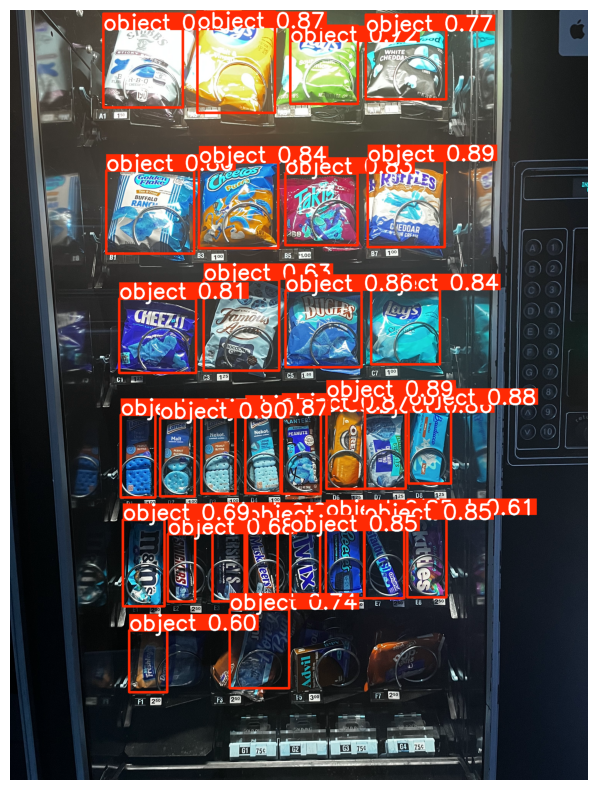

In [7]:
# Display the image with bounding boxes
for result in results:
    im_array = result.plot()  # plot returns BGR->RGB image
    plt.figure(figsize=(12, 8))
    plt.imshow(im_array)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# Directory to save cropped images
output_dir = "/Users/rodrigocarrillo/Documents/Computer Vision/Vending Machines/03_Cropped_Objects"
os.makedirs(output_dir, exist_ok=True)

# Access the results and crop
for result in results:
    # Get the original image from the result
    orig_img = result.orig_img
    
    # Get box coordinates and other info
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]
    confs = result.boxes.conf
    
    for idx, (box, name, conf) in enumerate(zip(xyxy, names, confs)):
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
        # Crop the image using cv2
        cropped_img = orig_img[y1:y2, x1:x2]
        
        # Save the cropped image
        confidence_str = f"{conf:.2f}".replace('.', '_')
        filename = f"{name}_{idx:03d}_conf_{confidence_str}.jpg"
        filepath = os.path.join(output_dir, filename)
        cv2.imwrite(filepath, cropped_img)
        
        print(f"Saved: {filename}")

print(f"\nAll cropped images saved to: {output_dir}")


Saved: object_000_conf_0_90.jpg
Saved: object_001_conf_0_89.jpg
Saved: object_002_conf_0_89.jpg
Saved: object_003_conf_0_88.jpg
Saved: object_004_conf_0_87.jpg
Saved: object_005_conf_0_87.jpg
Saved: object_006_conf_0_87.jpg
Saved: object_007_conf_0_87.jpg
Saved: object_008_conf_0_86.jpg
Saved: object_009_conf_0_86.jpg
Saved: object_010_conf_0_85.jpg
Saved: object_011_conf_0_85.jpg
Saved: object_012_conf_0_85.jpg
Saved: object_013_conf_0_85.jpg
Saved: object_014_conf_0_84.jpg
Saved: object_015_conf_0_84.jpg
Saved: object_016_conf_0_83.jpg
Saved: object_017_conf_0_81.jpg
Saved: object_018_conf_0_80.jpg
Saved: object_019_conf_0_77.jpg
Saved: object_020_conf_0_76.jpg
Saved: object_021_conf_0_74.jpg
Saved: object_022_conf_0_72.jpg
Saved: object_023_conf_0_69.jpg
Saved: object_024_conf_0_68.jpg
Saved: object_025_conf_0_68.jpg
Saved: object_026_conf_0_63.jpg
Saved: object_027_conf_0_61.jpg
Saved: object_028_conf_0_60.jpg
Saved: object_029_conf_0_60.jpg

All cropped images saved to: /Users/rod